# Exercise
Create a model that predicts the fashion item based on the image.<br>
* trainig data: FAshion MNIST
* test data: Fashion MNIST
* model: CNN
* loss: Catagorical Crossentropy
* optimizer: Adam
* metrics: Accuracy

## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
# load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

4422102/4422102 [==============================] - 0s 0us/step


## Build Model

In [4]:
# set the hyperparameters
n_class = 10
img_size = 28
batch_size = 500
n_epoch = 100
init_lr = 0.001

# define the model
inputs = tf.keras.layers.Input(shape=(img_size, img_size, 1))
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(n_class, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# setup the optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    init_lr,
    decay_steps=100000,
    decay_rate=0.96)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train Model

In [5]:
# set up th callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
callbacks = [early_stopping]

# train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_data=(x_test, y_test), callbacks=callbacks)

Epoch 1/100
120/120 [==============================] - 15s 27ms/step - loss: 0.6830 - accuracy: 0.7641 - val_loss: 1.6212 - val_accuracy: 0.8092
Epoch 2/100
120/120 [==============================] - 3s 25ms/step - loss: 0.3644 - accuracy: 0.8660 - val_loss: 1.0728 - val_accuracy: 0.8444
Epoch 3/100
120/120 [==============================] - 3s 27ms/step - loss: 0.3050 - accuracy: 0.8871 - val_loss: 0.5536 - val_accuracy: 0.8925
Epoch 4/100
120/120 [==============================] - 3s 26ms/step - loss: 0.2754 - accuracy: 0.8979 - val_loss: 0.3414 - val_accuracy: 0.8977
Epoch 5/100
120/120 [==============================] - 3s 26ms/step - loss: 0.2531 - accuracy: 0.9066 - val_loss: 0.2765 - val_accuracy: 0.8953
Epoch 6/100
120/120 [==============================] - 3s 26ms/step - loss: 0.2359 - accuracy: 0.9120 - val_loss: 0.2468 - val_accuracy: 0.9091
Epoch 7/100
120/120 [==============================] - 3s 28ms/step - loss: 0.2242 - accuracy: 0.9156 - val_loss: 0.2297 - val_accuracy

## Evaluate Model

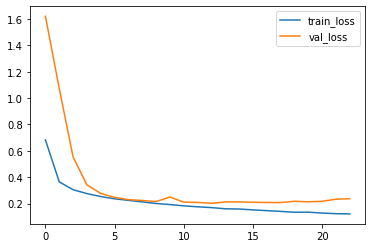

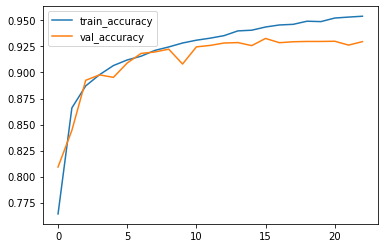

Test loss: 0.23644456267356873
Test accuracy: 0.9296000003814697


In [6]:
# Plot the loss and accuracy curves for training and validation
import matplotlib.pyplot as plt
import numpy as np

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(np.arange(len(train_loss)), train_loss, label='train_loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='train_accuracy')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data using `evaluate`
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

## Save Model

In [7]:
model.save('fashion_classifier.h5', include_optimizer=False)